In [97]:
import requests
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
import nltk
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
from wordcloud import WordCloud

In [38]:
data = pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [39]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [40]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [41]:
data.shape

(5572, 5)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Data Cleaning

In [43]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [44]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [45]:
data.v1

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [46]:
data.rename(columns={'v1': 'target', 'v2':'text'}, inplace=True)

In [47]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [48]:
Encoder = LabelEncoder()

In [49]:
data['target'] = Encoder.fit_transform(data['target'])

In [50]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [51]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [52]:
data.duplicated().sum()


403

In [53]:
data = data.drop_duplicates(keep='first')

In [54]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Analysis 

### Ham = 0
### Spam = 1

In [55]:
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

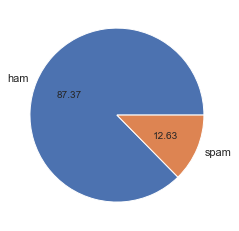

<Figure size 1600x1600 with 0 Axes>

In [56]:
%matplotlib inline

plt.pie(data['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.figure(figsize=(20,20), dpi=80)
plt.show()

The data has about 88% non-spam messages. This will affect our results because the data is not balance. 

In [57]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jawadkhattak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [58]:
data['numberOfCharacters'] = data['text'].apply(len)

In [59]:
data.head()

,target,text,numberOfCharacters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [60]:
data['numbersOfWords'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [61]:
data

,target,text,numberOfCharacters,numbersOfWords
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [62]:
data['numSentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [63]:
data.head()

,target,text,numberOfCharacters,numbersOfWords,numSentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [64]:
data[['numberOfCharacters', 'numbersOfWords', 'numSentences']].describe()

,numberOfCharacters,numbersOfWords,numSentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [65]:
#Ham
data[data['target'] == 0][['numberOfCharacters', 'numbersOfWords', 'numSentences']].describe()

,numberOfCharacters,numbersOfWords,numSentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [66]:
#Spam messages
data[data['target'] == 1][['numberOfCharacters', 'numbersOfWords', 'numSentences']].describe()

,numberOfCharacters,numbersOfWords,numSentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


## Observation

The spam messages are longer, with more words, characters and number of sentences. 

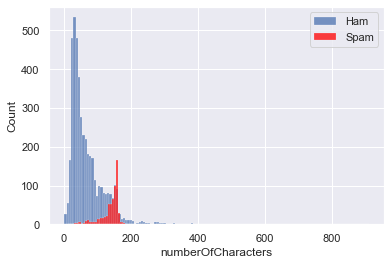

In [67]:


sns.histplot(data[data['target']==0]['numberOfCharacters'], label='Ham')
sns.histplot(data[data['target']==1]['numberOfCharacters'], color='red', label='Spam')
sns.set(rc={'figure.figsize':(10,10)})
plt.legend()

## words histogram


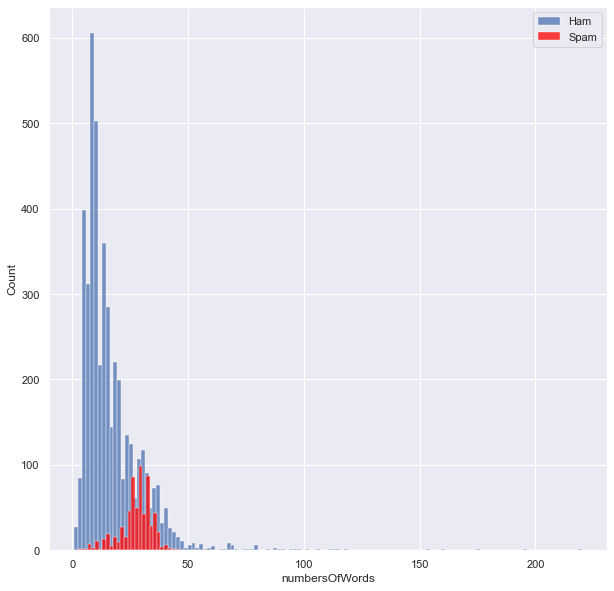

In [68]:
sns.histplot(data[data['target']==0]['numbersOfWords'], label='Ham')
sns.histplot(data[data['target']==1]['numbersOfWords'], color='red', label='Spam')
sns.set(rc={'figure.figsize':(10,15)})
plt.legend()

<Figure size 1080x1080 with 0 Axes>

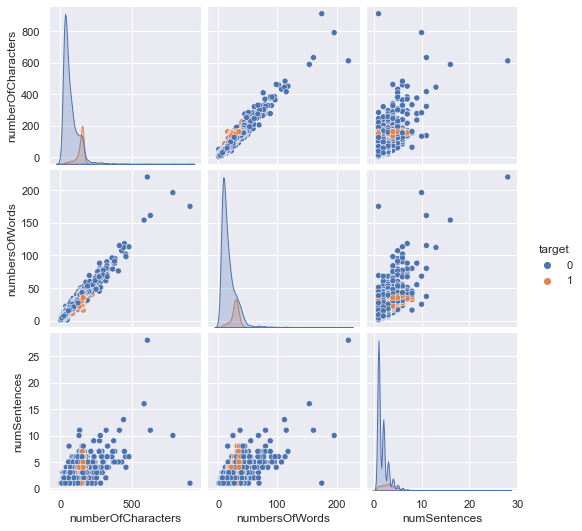

<Figure size 1080x1080 with 0 Axes>

In [69]:
sns.pairplot(data,hue='target')
plt.figure(figsize=(15,15))

<AxesSubplot:>

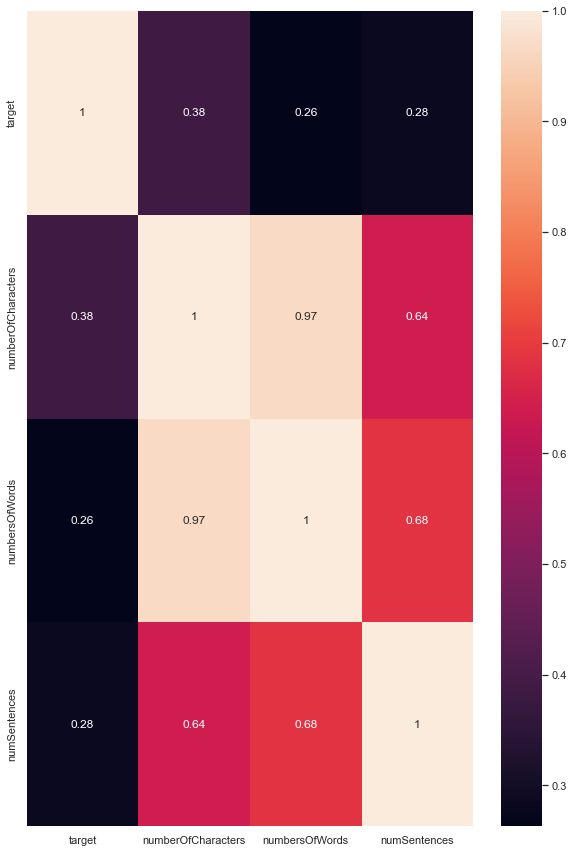

In [70]:
sns.heatmap(data.corr(), annot=True)

## Data Preprocessing
<LI> Lower case
<li> Tokenization
<lI> Removing special characters
<LI> Removing stop words and punctuation
<li> Stemming



In [82]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jawadkhattak/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [105]:
ps = PorterStemmer()
ps.stem('making')

'make'

In [87]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return y

In [91]:
transform_text("This is a PRACTICE problem @ 20 hours and i am loving it")


['practic', 'problem', '20', 'hour', 'love']

In [94]:
data['transformed_text'] = data['text'].apply(transform_text)

In [95]:
data.head()

,target,text,numberOfCharacters,numbersOfWords,numSentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


In [118]:
from wordcloud import WordCloud
wc  = WordCloud(width=50,height=50, min_font_size=10, background_color="black")


In [121]:
df = ' '.join(np.concatenate(data.transformed_text))
wordcloud = WordCloud(width=800, height=400).generate(' '.join(df))

KeyError: 102